## Predefined Functions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of n_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters['W' + str(i)] = ... 
                  parameters['b' + str(i)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

def compute_loss(a3, Y):
    
    """
    Implement the loss function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    loss - value of the loss function
    """
    
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

def load_cat_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    train_set_x_orig = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_orig = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
    
    train_set_x = train_set_x_orig/255
    test_set_x = test_set_x_orig/255

    return train_set_x, train_set_y, test_set_x, test_set_y, classes


def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions

def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

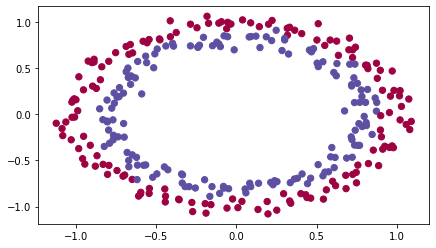

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

**Initialization Methods** 

1.Zeros Initialization 

2.Random Initialization 

3.He Initialization 

In [3]:
def model(X, Y, learning_rate = 0.1, num_iterations = 15000, print_cost = True, initialization = "he"):
  grads = {}
  costs = []
  m = X.shape[1]
  layers_dims = [X.shape[0], 10, 5, 1]

  if initialization == 'zeros':
    parameters = initialize_parameters_zeros(layers_dims)
  elif initialization == 'random':
    parameters = initialize_parameters_random(layers_dims)
  elif initialization == 'he':
    parameters = initialize_parameters_he(layers_dims)
  #Loop (Gradient Descent)
  for i in range(0, num_iterations):

    #Forward Propagation : LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    a3, cache = forward_propagation(X, parameters)

    #Loss
    cost = compute_loss(a3, Y)

    #Backward Propagation
    grads = backward_propagation(X, Y, cache)

    #Update parameters
    parameters = update_parameters(parameters, grads, learning_rate)

    #Print the Loss every 1000 iterations
    if print_cost and i % 1000 == 0 :
      print("cost after iteration {}: {}".format (i, cost))
      costs.append(cost)
    
  #plot the loss
  plt.plot(costs)
  plt.xlabel('cost')
  plt.ylabel('iterations per hundred')
  plt.title('Learning Rate = ' + str(learning_rate))
  plt.show()

  return parameters




### 1. Zero Initialization


In [4]:
def initialize_parameters_zeros(layers_dims):

  parameters = {}
  L = len(layers_dims)            # number of layers in the network
    
  for l in range(1, L):
    
    parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
    parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
  
  return parameters

In [5]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


cost after iteration 0: 0.6931471805599453
cost after iteration 1000: 0.6931471805599453
cost after iteration 2000: 0.6931471805599453
cost after iteration 3000: 0.6931471805599453
cost after iteration 4000: 0.6931471805599455
cost after iteration 5000: 0.6931471805599453
cost after iteration 6000: 0.6931471805599453
cost after iteration 7000: 0.6931471805599453
cost after iteration 8000: 0.6931471805599453
cost after iteration 9000: 0.6931471805599453
cost after iteration 10000: 0.6931471805599455
cost after iteration 11000: 0.6931471805599453
cost after iteration 12000: 0.6931471805599453
cost after iteration 13000: 0.6931471805599453
cost after iteration 14000: 0.6931471805599453


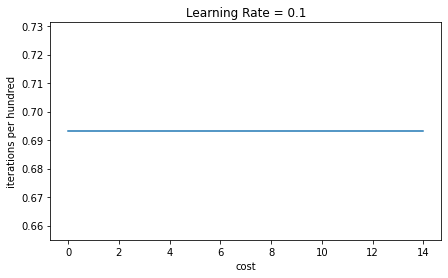

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [6]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

### 2.Random Initialization



In [7]:
def initialize_parameters_random(layers_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layers_dims)

  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1] * 10)
    parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
  return parameters

In [8]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882  -0.35475898
  -0.08274148 -0.62700068 -0.04381817 -0.47721803 -1.31386475  0.88462238
   0.88131804  1.70957306  0.05003364 -0.40467741 -0.54535995 -1.54647732
   0.98236743 -1.10106763 -1.18504653 -0.2056499   1.48614836  0.23671627
  -1.02378514 -0.7129932   0.62524497 -0.16051336 -0.76883635 -0.23003072]
 [ 0.74505627  1.97611078 -1.24412333 -0.62641691 -0.80376609 -2.41908317
  -0.92379202 -1.02387576  1.12397796 -0.13191423 -1.62328545  0.64667545
  -0.35627076 -1.74314104 -0.59664964 -0.58859438 -0.8738823   0.02971382
  -2.24825777 -0.26776186  1.01318344  0.85279784  1.1081875   1.11939066
   1.48754313 -1.11830068  0.84583341 -1.86088953 -0.6028851  -1.91447204]]
b1 = [[0.]
 [0.]]
W2 = [[ 1.04814751  1.33373782 -0.19741468  1.77464503 -0.67472751  0.15061687
   0.1529457  -1.06419527  0.43794661  1.93897846 -1.02493087  0.89933845
  -0.15450685  1.7696273   0.48378835  0.6762164   0.64316328  0.24908671
  -1.39

### 3. He Initialization


In [9]:
def initialize_parameters_he(layers_dims):
  np.random.seed(3)
  parameters = {}
  L = len(layers_dims) - 1

  for l in range(1, L + 1):
    parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
    parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

  return parameters

In [10]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


cost after iteration 0: 0.8830537463419761
cost after iteration 1000: 0.14973049216090262
cost after iteration 2000: 0.040453087319788424
cost after iteration 3000: 0.02229232277914853
cost after iteration 4000: 0.017032021294267716
cost after iteration 5000: 0.014357098970523606
cost after iteration 6000: 0.012751749251181022
cost after iteration 7000: 0.011652992168177723
cost after iteration 8000: 0.010854556691548266
cost after iteration 9000: 0.01024832355760735
cost after iteration 10000: 0.00977939491240048
cost after iteration 11000: 0.009388512707955725
cost after iteration 12000: 0.009072603116507634
cost after iteration 13000: 0.008806396753491203
cost after iteration 14000: 0.008577853656816117


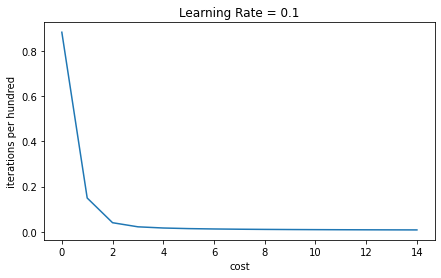

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [11]:
parameters = model(train_X, train_Y, initialization = "he")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

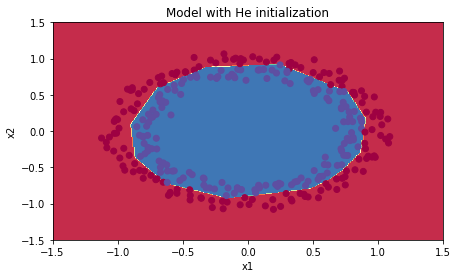

In [12]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)